[1] "ABC аналіз:"
   Product Total Percentage CumulativePercentage ABC_Group
5        E 46200      22.27                22.27         A
3        C 33900      16.34                38.61         A
8        H 32700      15.76                54.37         A
1        A 25350      12.22                66.58         A
2        B 19430       9.36                75.95         A
11       K 10920       5.26                81.21         B
7        G 10670       5.14                86.36         B
4        D  9000       4.34                90.69         B
10       J  8500       4.10                94.79         B
6        F  7240       3.49                98.28         C
9        I  1810       0.87                99.15         C
12       L  1760       0.85               100.00         C
[1] "XYZ аналіз:"
   Product    Mean StdDev    CV XYZ_Group
5        E 3850.00 360.56  9.37         X
3        C 2825.00 180.28  6.38         X
8        H 2725.00 180.28  6.62         X
1        A 2112.50 141.62  6.

ERROR while rich displaying an object: Error in trans(...): object 'Total' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
9. re

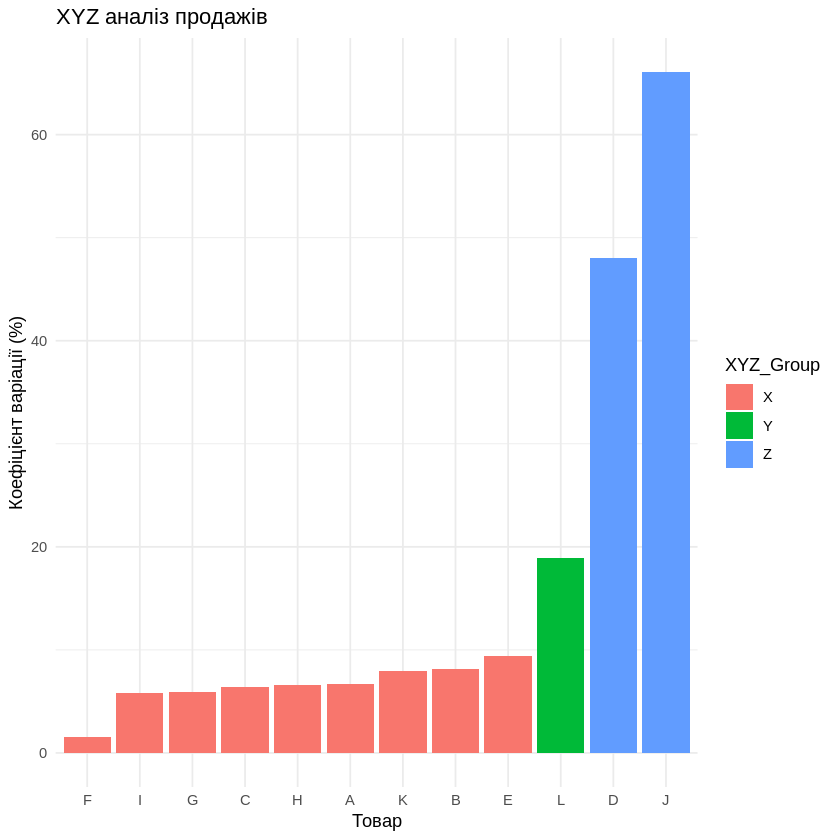

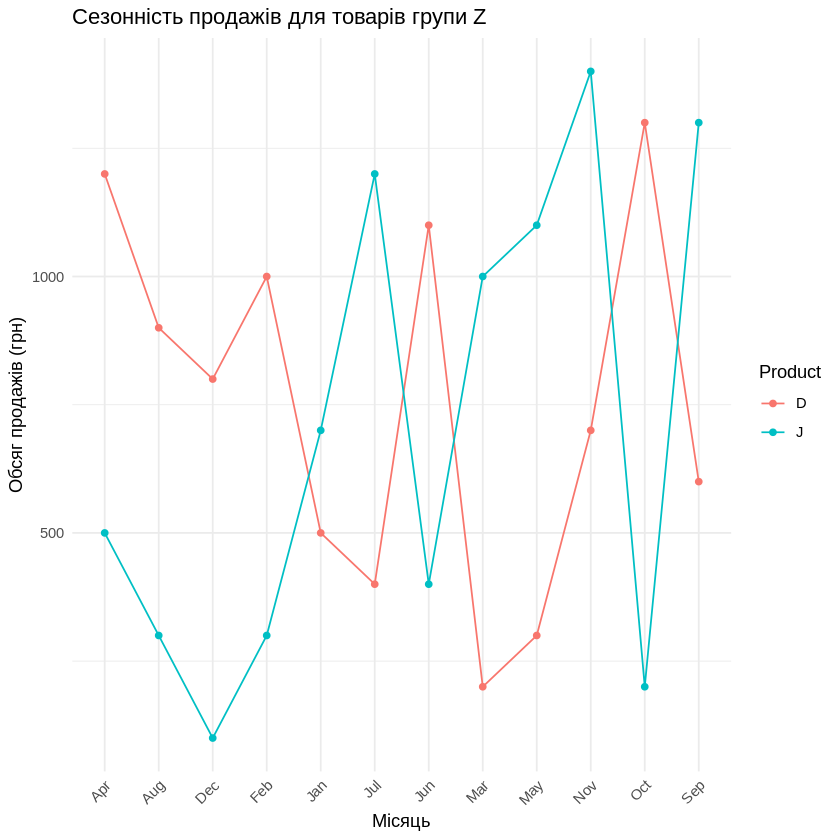

In [6]:
# Завантаження необхідних бібліотек
library(dplyr)
library(ggplot2)
library(knitr)

# Створення датафрейму з наданими даними
sales_data <- data.frame(
  Product = c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"),
  Jan = c(2000, 1800, 3000, 500, 3500, 600, 1000, 2500, 150, 700, 800, 100),
  Feb = c(2100, 1850, 3100, 1000, 3600, 590, 900, 2450, 140, 300, 820, 150),
  Mar = c(1900, 1750, 2900, 200, 3700, 610, 800, 2550, 160, 1000, 840, 120),
  Apr = c(1950, 1700, 3050, 1200, 3400, 605, 950, 2600, 155, 500, 860, 110),
  May = c(2000, 1650, 2950, 300, 3300, 600, 850, 2650, 145, 1100, 880, 160),
  Jun = c(2050, 1600, 2850, 1100, 3800, 595, 920, 2700, 135, 400, 900, 130),
  Jul = c(2100, 1580, 2800, 400, 3900, 620, 870, 2750, 165, 1200, 920, 170),
  Aug = c(2150, 1550, 2750, 900, 4000, 610, 890, 2800, 150, 300, 940, 140),
  Sep = c(2200, 1520, 2700, 600, 4100, 615, 910, 2850, 155, 1300, 960, 180),
  Oct = c(2250, 1500, 2650, 1300, 4200, 600, 860, 2900, 160, 200, 980, 150),
  Nov = c(2300, 1480, 2600, 700, 4300, 590, 880, 2950, 145, 1400, 1000, 190),
  Dec = c(2350, 1450, 2550, 800, 4400, 605, 840, 3000, 150, 100, 1020, 160)
)

# Перетворення даних для зручності аналізу - додавання сумарних показників
sales_data$Total <- rowSums(sales_data[, 2:13])  # Річний обсяг продажів
total_sales <- sum(sales_data$Total)  # Загальний обсяг продажів

# a) ABC аналіз
sales_data$Percentage <- sales_data$Total / total_sales * 100  # Відсоткова частка
sales_data <- sales_data[order(-sales_data$Total), ]  # Сортування за спаданням
sales_data$CumulativePercentage <- cumsum(sales_data$Percentage)  # Кумулятивний відсоток

# Визначення ABC груп
sales_data$ABC_Group <- ifelse(sales_data$CumulativePercentage <= 80, "A",
                              ifelse(sales_data$CumulativePercentage <= 95, "B", "C"))

# b) XYZ аналіз
# Обчислення середнього значення та стандартного відхилення для кожного товару
monthly_data <- sales_data[, 2:13]
sales_data$Mean <- rowMeans(monthly_data)
sales_data$StdDev <- apply(monthly_data, 1, sd)
sales_data$CV <- (sales_data$StdDev / sales_data$Mean) * 100  # Коефіцієнт варіації

# Визначення XYZ груп
sales_data$XYZ_Group <- ifelse(sales_data$CV <= 10, "X",
                              ifelse(sales_data$CV <= 25, "Y", "Z"))

# Визначення ABC-XYZ матриці
sales_data$ABC_XYZ <- paste0(sales_data$ABC_Group, sales_data$XYZ_Group)

# Виведення результатів
# Підсумкова таблиця ABC аналізу
abc_results <- sales_data %>%
  select(Product, Total, Percentage, CumulativePercentage, ABC_Group) %>%
  mutate(Percentage = round(Percentage, 2),
         CumulativePercentage = round(CumulativePercentage, 2))
print("ABC аналіз:")
print(abc_results)

# Підсумкова таблиця XYZ аналізу
xyz_results <- sales_data %>%
  select(Product, Mean, StdDev, CV, XYZ_Group) %>%
  mutate(Mean = round(Mean, 2),
         StdDev = round(StdDev, 2),
         CV = round(CV, 2))
print("XYZ аналіз:")
print(xyz_results)

# Матриця ABC-XYZ
abc_xyz_matrix <- table(sales_data$ABC_Group, sales_data$XYZ_Group)
print("ABC-XYZ матриця:")
print(abc_xyz_matrix)

# Детальна матриця з товарами
matrix_details <- sales_data %>%
  select(Product, ABC_Group, XYZ_Group, ABC_XYZ) %>%
  arrange(ABC_Group, XYZ_Group)
print("Детальна матриця ABC-XYZ з товарами:")
print(matrix_details)

# Візуалізація ABC аналізу
ggplot(sales_data, aes(x = reorder(Product, -Total), y = Total, fill = ABC_Group)) +
  geom_bar(stat = "identity") +
  geom_line(aes(y = CumulativePercentage * max(Total) / 100, group = 1), color = "red", size = 1) +
  scale_y_continuous(sec.axis = sec_axis(~. * 100 / max(Total), name = "Кумулятивний відсоток (%)")) +
  labs(title = "ABC аналіз продажів", x = "Товар", y = "Обсяг продажів (грн)") +
  theme_minimal()

# Візуалізація XYZ аналізу
ggplot(sales_data, aes(x = reorder(Product, CV), y = CV, fill = XYZ_Group)) +
  geom_bar(stat = "identity") +
  labs(title = "XYZ аналіз продажів", x = "Товар", y = "Коефіцієнт варіації (%)") +
  theme_minimal()

# Аналіз сезонності для вибраних товарів
# Перетворення даних для часового ряду
months <- colnames(sales_data)[2:13]
seasonal_data <- data.frame()

for (i in 1:nrow(sales_data)) {
  product_data <- data.frame(
    Product = rep(sales_data$Product[i], 12),
    Month = months,
    Sales = as.numeric(sales_data[i, 2:13]),
    ABC_Group = rep(sales_data$ABC_Group[i], 12),
    XYZ_Group = rep(sales_data$XYZ_Group[i], 12)
  )
  seasonal_data <- rbind(seasonal_data, product_data)
}

# Графік сезонності для товарів групи Z (найбільша варіативність)
z_products <- unique(seasonal_data$Product[seasonal_data$XYZ_Group == "Z"])
seasonal_data_z <- seasonal_data[seasonal_data$Product %in% z_products, ]

ggplot(seasonal_data_z, aes(x = Month, y = Sales, group = Product, color = Product)) +
  geom_line() +
  geom_point() +
  labs(title = "Сезонність продажів для товарів групи Z", x = "Місяць", y = "Обсяг продажів (грн)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
